In [1]:
import pandas as pd
import numpy as np
import datetime
from wordcloud import WordCloud
import seaborn as sb
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen 
from urllib.error import HTTPError
from urllib.error import URLError
from bs4 import BeautifulSoup

In [593]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
import seaborn as sb

In [537]:
df=pd.read_csv("stage3.csv",parse_dates=['date'],infer_datetime_format=True)

In [562]:
text=[]
for i in range(len(df)):
    text.append(df['incident_characteristics'][i])

In [564]:
with open("file.txt", "w") as output:
    output.write(str(text))

In [566]:
from sklearn.feature_extraction.text import CountVectorizer

In [567]:
text_vector=CountVectorizer(analyzer=word_process).fit(text)

In [569]:
pos_mat=text_vector.transform(text)

In [571]:
len(text_vector.vocabulary_)

243

In [572]:
pos_mat.shape

(239677, 243)

In [578]:
counts=pos_mat.toarray().ravel()
words = np.array(text_vector.get_feature_names())
counts = counts / float(counts.max())

In [583]:
t=open('file.txt').read()

In [584]:
wordcloud = WordCloud().generate(t)

In [590]:
import matplotlib.pyplot as plt
sb.set(rc={'figure.figsize':(15,10)})
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

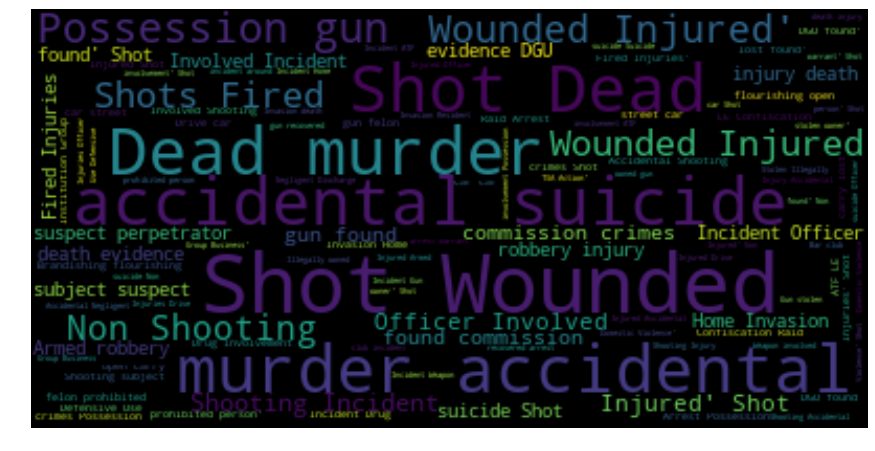

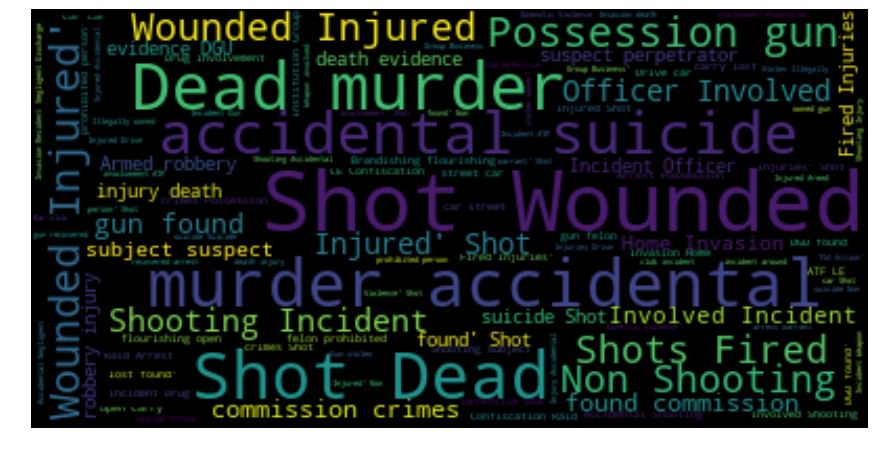

In [591]:
wordcloud = WordCloud(max_font_size=40).generate(t)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [510]:
stp_text=[]
for x in text:
  if x not in list(string.punctuation):
    stp_text.append(x)

In [542]:
df['incident_characteristics']=df['incident_characteristics'].str.replace('|'," ")
df['incident_characteristics']=df['incident_characteristics'].str.replace('/'," ")
df['incident_characteristics']=df['incident_characteristics'].str.replace('('," ")
df['incident_characteristics']=df['incident_characteristics'].str.replace(')'," ")
df['incident_characteristics']=df['incident_characteristics'].str.replace('-'," ")
df['incident_characteristics']=df['incident_characteristics'].astype(str)

In [540]:
def word_process(text):
    tok=word_tokenize(text)
    return [word for word in tok if not word in stopwords.words('english')]

In [543]:
df['Tokens']=df['incident_characteristics'].apply(word_process)

In [539]:
df['incident_characteristics'][0]

'Shot   Wounded Injured  Mass Shooting  4+ victims injured or killed excluding the subject suspect perpetrator, one location   Possession  gun s  found during commission of other crimes   Possession of gun by felon or prohibited person'

In [544]:
x=[]
for i in range(len(df)):
    x.append(df['incident_characteristics'][i])

In [547]:
tokenized_sents = [word_tokenize(i) for i in x]

In [553]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [556]:
from sklearn.feature_extraction.text import CountVectorizer

In [559]:
cv = CountVectorizer(min_df=0,                                               
                         stop_words="english", max_features=200)